In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
data= pd.read_csv ('C:/Users/Vycky/Documents/Marchine learning/insurance.csv')

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [22]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
data.shape

(1338, 7)

In [24]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [25]:
data ['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
data ['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [28]:
data ['sex'].unique()

array(['female', 'male'], dtype=object)

In [29]:
#cleaning the data.

In [30]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

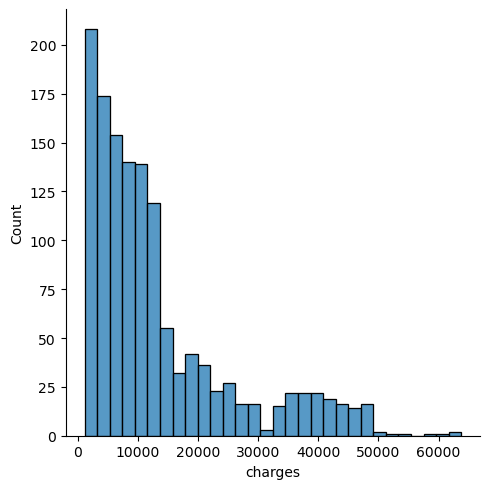

In [31]:
#histogram
sns.displot(data['charges']);

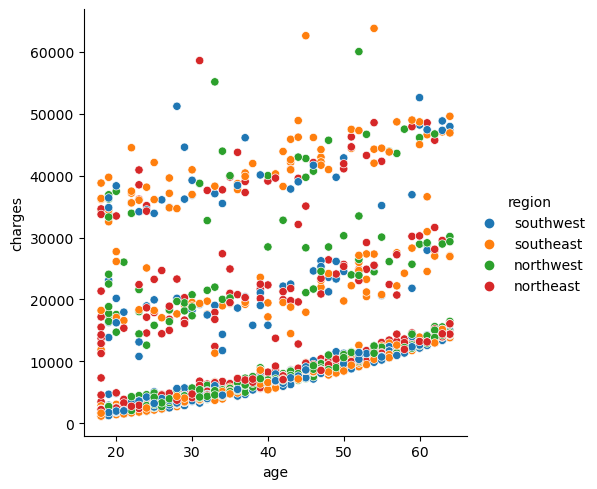

In [32]:
sns.relplot(x='age', y='charges', hue='region',data=data)
mp.show()

In [33]:
corelation = data.corr()

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


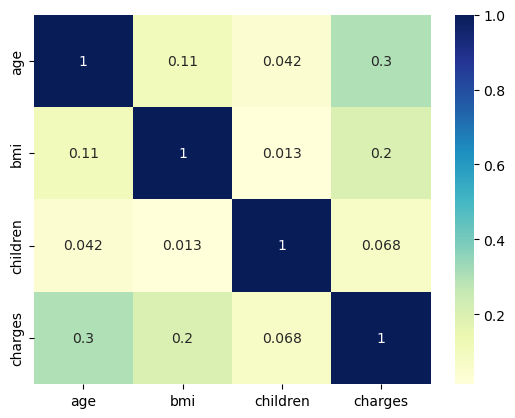

In [34]:
print(data.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

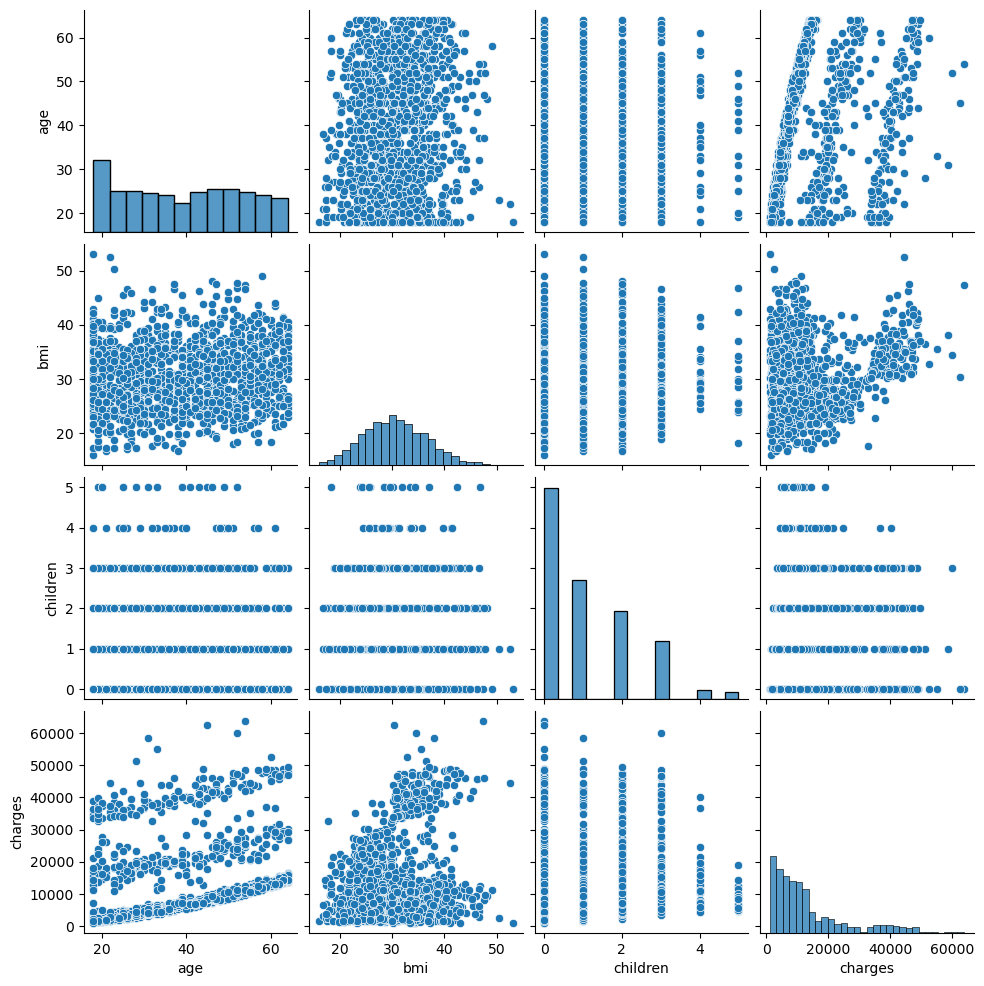

In [35]:
sns.pairplot(data)
mp.show()

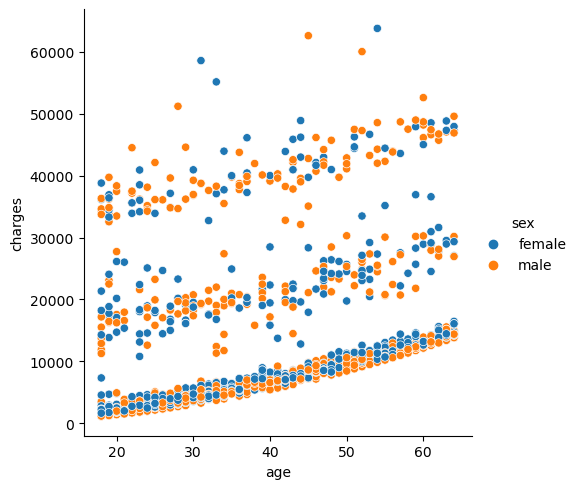

In [36]:
sns.relplot(x='age', y='charges', hue='sex',data=data)
mp.show()

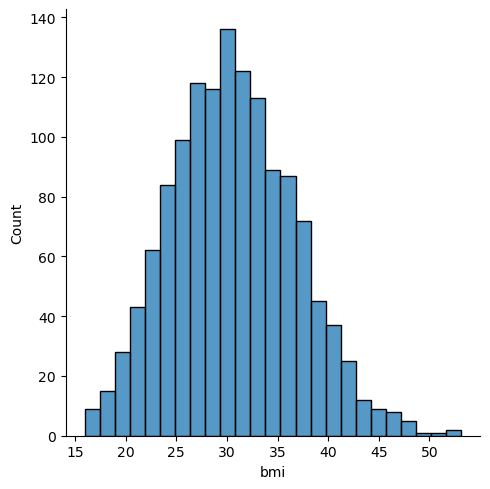

In [38]:
sns.displot(data['bmi'])
mp.show()

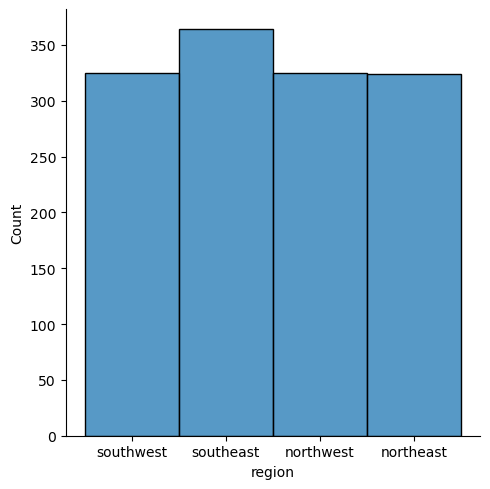

In [39]:
sns.displot(data['region'])
mp.show()

In [42]:
x =  data[['age', 'children']]

In [43]:
y = data['charges']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [45]:
model = LinearRegression()

In [46]:
model.fit(x_train, y_train)

LinearRegression()

In [47]:
print(model.coef_)

[264.76829396 321.83971539]


In [48]:
print(model.intercept_)

2459.6619254871985


In [49]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
age,264.768294
children,321.839715


In [50]:
#making predictions from our model

In [51]:
predictions = model.predict(x_test)

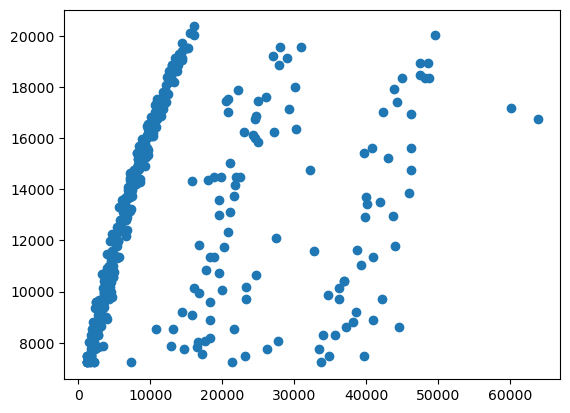

In [52]:
mp.scatter(y_test, predictions)
mp.show()

In [54]:
#testing performance of our model

In [55]:
metrics.mean_absolute_error(y_test, predictions)

9199.147142488915

In [56]:
metrics.mean_squared_error(y_test, predictions)

140697999.4241373

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [81]:
data = pd.read_csv("C:/Users/Vycky/Documents/Marchine learning/insurance.csv")

In [82]:
data = pd.get_dummies(data, columns=["sex", "smoker", "region"])

In [89]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [93]:
data['charges'] = data['charges'].astype(int)
data['charges'] = data['charges'].apply(lambda x: 1 if x == 'Yes' else 0)